In [1]:
%pip install numpy==1.24.4 Pillow==10.3.0 Requests==2.31.0 torch==2.3.0 torchvision==0.18.0 transformers==4.40.2

Note: you may need to restart the kernel to use updated packages.


In [2]:
from torch import cuda

device = f'cuda:{cuda.current_device()}' if cuda.is_available() else 'cpu'
print(device)

cuda:0


In [3]:
#%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [4]:
import torch

print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("Current GPU:", torch.cuda.current_device())
print("Device Name:", torch.cuda.get_device_name(torch.cuda.current_device()) if torch.cuda.is_available() else "No GPU")

CUDA available: True
Number of GPUs: 1
Current GPU: 0
Device Name: NVIDIA GeForce GTX 1650


In [5]:
%pip install accelerate bitsandbytes

Note: you may need to restart the kernel to use updated packages.


In [6]:
from transformers import AutoModelForCausalLM

model_id = "microsoft/Phi-3-vision-128k-instruct"

# Using quatization to load the model with less GPU memory
from torch import bfloat16
import transformers

bnb_config = transformers.BitsAndBytesConfig(
    load_in_4bit=True,   # 4-bit quantization
    bnb_4bit_quant_type='nf4', # Normalized float 4
    bnb_4bit_use_double_quant=True, # Second quantization after the first
    bnb_4bit_compute_dtype=bfloat16 # computation type
)

model = AutoModelForCausalLM.from_pretrained(model_id,
                                             device_map="cuda",
                                             trust_remote_code=True,
                                             quantization_config=bnb_config,
                                             torch_dtype="auto",
                                             _attn_implementation="eager")

c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:24<00:00, 12.04s/it]
c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
model.config

Phi3VConfig {
  "_name_or_path": "microsoft/Phi-3-vision-128k-instruct",
  "architectures": [
    "Phi3VForCausalLM"
  ],
  "attention_dropout": 0.0,
  "auto_map": {
    "AutoConfig": "microsoft/Phi-3-vision-128k-instruct--configuration_phi3_v.Phi3VConfig",
    "AutoModelForCausalLM": "microsoft/Phi-3-vision-128k-instruct--modeling_phi3_v.Phi3VForCausalLM"
  },
  "bos_token_id": 1,
  "embd_layer": {
    "embedding_cls": "image",
    "hd_transform_order": "sub_glb",
    "projection_cls": "mlp",
    "use_hd_transform": true,
    "with_learnable_separator": true
  },
  "embd_pdrop": 0.0,
  "eos_token_id": 2,
  "hidden_act": "silu",
  "hidden_size": 3072,
  "img_processor": {
    "image_dim_out": 1024,
    "model_name": "openai/clip-vit-large-patch14-336",
    "name": "clip_vision_model",
    "num_img_tokens": 144
  },
  "initializer_range": 0.02,
  "intermediate_size": 8192,
  "max_position_embeddings": 131072,
  "model_type": "phi3_v",
  "num_attention_heads": 32,
  "num_hidden_layers": 

In [8]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained(model_id, trust_remote_code=True)

c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
print(processor.__doc__)


    Constructs a Phi3-V processor which wraps a Phi3-V image processor and a LLaMa tokenizer into a single processor.

    [`Phi3VProcessor`] offers all the functionalities of [`Phi3VImageProcessor`] and [`LlamaTokenizerFast`]. See the
    [`~Phi3VProcessor.__call__`] and [`~Phi3VProcessor.decode`] for more information.

    Args:
        image_processor ([`Phi3VImageProcessor`], *optional*):
            The image processor is a required input.
        tokenizer ([`LlamaTokenizerFast`], *optional*):
            The tokenizer is a required input.
    


In [10]:
messages = [
    {
        "role": "user", 
        "content": "<|image_1|>\nYou are an AI designed to generate detailed test cases for web applications. The image provided is a screenshot of a web application. Based on this image, generate a test case that includes:\n\n1. **Description:** A brief overview of what is being tested.\n2. **Pre-conditions:** The setup required before testing.\n3. **Testing Steps:** A clear, step-by-step guide on how to execute the test.\n4. **Expected Result:** What the expected outcome should be if the feature works correctly."
    }
]

prompt = processor.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

In [11]:
print(prompt)

<|user|>
<|image_1|>
You are an AI designed to generate detailed test cases for web applications. The image provided is a screenshot of a web application. Based on this image, generate a test case that includes:

1. **Description:** A brief overview of what is being tested.
2. **Pre-conditions:** The setup required before testing.
3. **Testing Steps:** A clear, step-by-step guide on how to execute the test.
4. **Expected Result:** What the expected outcome should be if the feature works correctly.<|end|>
<|assistant|>



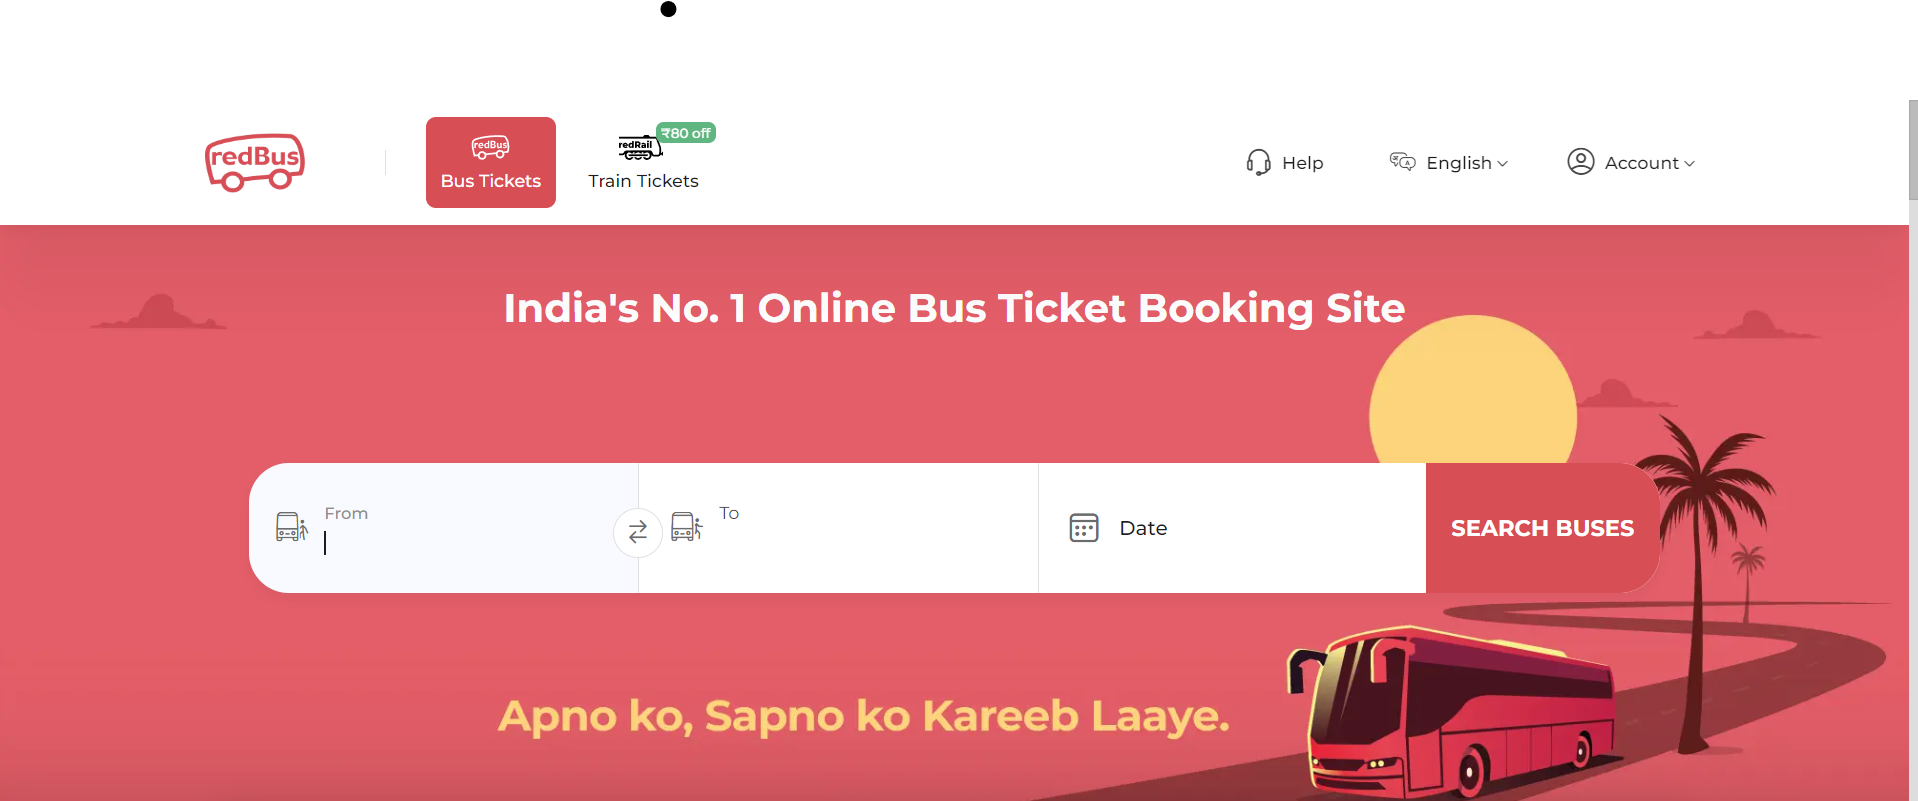

In [12]:
from PIL import Image
image = Image.open('RedBus.png')
image

In [13]:
inputs = processor(prompt, [image], return_tensors="pt").to("cuda:0")
inputs

{'input_ids': tensor([[    1, 32010, 29871,  ..., 29871,    13, 32001]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], device='cuda:0'), 'pixel_values': tensor([[[[[ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           ...,
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303],
           [ 1.9303,  1.9303,  1.9303,  ...,  1.9303,  1.9303,  1.9303]],

          [[ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           ...,
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0749,  2.0749],
           [ 2.0749,  2.0749,  2.0749,  ...,  2.0749,  2.0

In [14]:
generation_args = {
    "max_new_tokens": 500,
    "temperature": 0.0,
    "do_sample": False,
}

In [15]:
%%time
generate_ids = model.generate(**inputs, eos_token_id=processor.tokenizer.eos_token_id, **generation_args)

c:\Users\aarav\anaconda3\envs\EmotionalIntelligence\Lib\site-packages\transformers\generation\configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\aarav\.cache\huggingface\modules\transformers_modules\microsoft\Phi-3-vision-128k-instruct\c45209e90a4c4f7d16b2e9d48503c7f3e83623ed\image_embedding_phi3_v.py:197: UserWarning: Phi-3-V modifies `input_ids` in-place and the tokens indicating images will be removed after model forward. If your workflow requires multiple forward passes on the same `input_ids`, please make a copy of `input_ids` before passing it to the model.
  warnings.warn(
You are not running the flash-attention implementation, expect numerical differences.


CPU times: total: 3min 18s
Wall time: 4min 5s


In [16]:
# remove input tokens
generate_ids = generate_ids[:, inputs['input_ids'].shape[1]:]
response = processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_tokenization_spaces=False)[0]

In [17]:
print(response)


1. **Description:** Test the functionality of the bus ticket booking feature on the redBus website.
2. **Pre-conditions:** The user must have an active internet connection and be logged into their account.
3. **Testing Steps:**
   - Navigate to the redBus website.
   - Click on the 'Book Tickets' button.
   - Enter the desired departure and arrival locations.
   - Select the type of bus service (e.g., regular, deluxe, super deluxe).
   - Choose the date for the bus journey.
   - Click on the 'Book Now' button.
4. **Expected Result:** The user should be presented with a confirmation page showing the booked bus tickets with the details of the journey, including the date, time, and fare. The user should also have the option to cancel the booking if needed.


In [18]:
print(response.replace("**",""))


1. Description: Test the functionality of the bus ticket booking feature on the redBus website.
2. Pre-conditions: The user must have an active internet connection and be logged into their account.
3. Testing Steps:
   - Navigate to the redBus website.
   - Click on the 'Book Tickets' button.
   - Enter the desired departure and arrival locations.
   - Select the type of bus service (e.g., regular, deluxe, super deluxe).
   - Choose the date for the bus journey.
   - Click on the 'Book Now' button.
4. Expected Result: The user should be presented with a confirmation page showing the booked bus tickets with the details of the journey, including the date, time, and fare. The user should also have the option to cancel the booking if needed.
